<a href="https://colab.research.google.com/github/amirhoseinaghaei/Research_Simulation/blob/main/Simulation_With_Quantum_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!fusermount -u drive
!google-drive-ocamlfuse drive
from google.colab import drive 
drive.mount('/content/gdrive/')
%cd gdrive/MyDrive/Research_Simmulation/


fusermount: failed to unmount /content/drive: No such file or directory
/bin/bash: google-drive-ocamlfuse: command not found
Mounted at /content/gdrive/
/content/gdrive/MyDrive/Research_Simmulation


In [5]:
!pip install tensorflow==2.7.0
!pip install tensorflow-quantum==0.7.2
!pip install gym==0.18.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 KB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.5/576.5 KB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [8]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)
import tensorflow as tf
import tensorflow_quantum as tfq

import gym, cirq, sympy
import numpy as np
from functools import reduce
from collections import deque, defaultdict
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
tf.get_logger().setLevel('ERROR')

NotFoundError: ignored

In [7]:

import numpy as np
# from Environment import Actor
from Rudder import LessonBuffer
from Environment import Environment
from Rudder import RRLSTM as LSTM
import torch
import time as Time
import random
from PolicyUpdater import PolicyUpdater
from tqdm import tqdm
from collections import deque, defaultdict


from datetime import datetime

def gather_episodes(num_of_episodes , model):
  time1 = datetime.now()
  trajectories = [defaultdict(list) for _ in range(num_of_episodes)]
  environment = Environment(1000,100)
  environment.CreateStates()
  episode = 0
  for i in tqdm(range(num_of_episodes)):
      episode += 1
      environment.reset_paramter()
      state, _ = environment.reset_state()
      if state[1] == "Ch1":
          state[1] = 1
      else:
          state[1] = 0
      environment.generate_channel_state_list_for_whole_sequence(state[1])
      rewards = []
      states = [state]
      actions = []
      done = False
      name = f'({state[0]}, {state[1]}, {state[2]}, {state[3]}, {state[4]})'
      policy = (model([tf.convert_to_tensor([state.astype(float)])])).numpy()
      while not done:
 
          action = np.random.choice(n_actions, p=policy[0])
          if environment.state.Ra == 0 and environment.state.U == 0:
              action = 0
          if environment.state.U > 0:
              action = 0
          if environment.sendbackaction == True:
              action = 1

          state, reward, done = environment.step(action)
          if state[1] == "Ch1":
              state[1] = 1
          else:
              state[1] = 0
          state = np.stack(state)
          state = state.astype(int)
          reward = np.array(reward, dtype = np.float32)
          action = np.array(action)
          # actions.append(action)
          # states.append(state)
          # rewards.append(reward) 
          trajectories[episode-1]["states"].append(state)
          trajectories[episode-1]["actions"].append(action)
          trajectories[episode-1]["rewards"].append(reward)
          # if done: 

          #     res = np.nonzero(rewards)[0]
          #     if rewards[-1] == 0 and len(res) > 0 :
          #       rewards[-1] = sum(rewards)
          #       rewards[-1] = rewards[-1]
          #       rewards[res[0]] = 0
          #     else:
          #       rewards[-1] = rewards[-1]
                
              # for i in states: 
              #     if i[1] == "Ch1":
              #         i[1] = 1
              #     else:
              #         i[1] = 0

         
  return trajectories

[[0.2, 0.8], [0.30000000000000004, 0.7]]


In [98]:
trajectories = gather_episodes(1, model)

[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


  0%|          | 0/1 [00:00<?, ?it/s]

1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
1


100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

1
0
0


KeyboardInterrupt: ignored

In [82]:

a = ((trajectories[0]["actions"]))


In [100]:
def one_qubit_rotation(qubit, symbols):
    """
    Returns Cirq gates that apply a rotation of the bloch sphere about the X,
    Y and Z axis, specified by the values in `symbols`.
    """
    return [cirq.rx(symbols[0])(qubit),
            cirq.ry(symbols[1])(qubit),
            cirq.rz(symbols[2])(qubit)]

def entangling_layer(qubits):
    """
    Returns a layer of CZ entangling gates on `qubits` (arranged in a circular topology).
    """
    cz_ops = [cirq.CZ(q0, q1) for q0, q1 in zip(qubits, qubits[1:])]
    cz_ops += ([cirq.CZ(qubits[0], qubits[-1])] if len(qubits) != 2 else [])
    return cz_ops
def generate_circuit(qubits, n_layers):
    """Prepares a data re-uploading circuit on `qubits` with `n_layers` layers."""
    # Number of qubits
    n_qubits = len(qubits)
    
    # Sympy symbols for variational angles
    params = sympy.symbols(f'theta(0:{3*(n_layers+1)*n_qubits})')
    params = np.asarray(params).reshape((n_layers + 1, n_qubits, 3))
    
    # Sympy symbols for encoding angles
    inputs = sympy.symbols(f'x(0:{n_layers})'+f'_(0:{n_qubits})')
    inputs = np.asarray(inputs).reshape((n_layers, n_qubits))
    
    # Define circuit
    circuit = cirq.Circuit()
    for l in range(n_layers):
        # Variational layer
        circuit += cirq.Circuit(one_qubit_rotation(q, params[l, i]) for i, q in enumerate(qubits))
        circuit += entangling_layer(qubits)
        # Encoding layer
        circuit += cirq.Circuit(cirq.rx(inputs[l, i])(q) for i, q in enumerate(qubits))

    # Last varitional layer
    circuit += cirq.Circuit(one_qubit_rotation(q, params[n_layers, i]) for i,q in enumerate(qubits))
    
    return circuit, list(params.flat), list(inputs.flat)

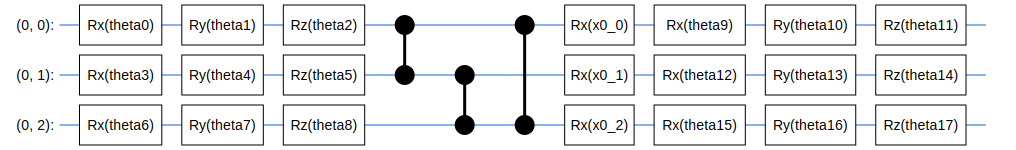

In [101]:
n_qubits, n_layers = 3, 1
qubits = cirq.GridQubit.rect(1, n_qubits)
circuit, _, _ = generate_circuit(qubits, n_layers)
SVGCircuit(circuit)

In [102]:
class ReUploadingPQC(tf.keras.layers.Layer):
    """
    Performs the transformation (s_1, ..., s_d) -> (theta_1, ..., theta_N, lmbd[1][1]s_1, ..., lmbd[1][M]s_1,
        ......., lmbd[d][1]s_d, ..., lmbd[d][M]s_d) for d=input_dim, N=theta_dim and M=n_layers.
    An activation function from tf.keras.activations, specified by `activation` ('linear' by default) is
        then applied to all lmbd[i][j]s_i.
    All angles are finally permuted to follow the alphabetical order of their symbol names, as processed
        by the ControlledPQC.
    """

    def __init__(self, qubits, n_layers, observables, activation="linear", name="re-uploading_PQC"):
        super(ReUploadingPQC, self).__init__(name=name)
        self.n_layers = n_layers
        self.n_qubits = len(qubits)

        circuit, theta_symbols, input_symbols = generate_circuit(qubits, n_layers)

        theta_init = tf.random_uniform_initializer(minval=0.0, maxval=np.pi)
        self.theta = tf.Variable(
            initial_value=theta_init(shape=(1, len(theta_symbols)), dtype="float32"),
            trainable=True, name="thetas"
        )
        
        lmbd_init = tf.ones(shape=(self.n_qubits * self.n_layers,))
        self.lmbd = tf.Variable(
            initial_value=lmbd_init, dtype="float32", trainable=True, name="lambdas"
        )
        
        # Define explicit symbol order.
        symbols = [str(symb) for symb in theta_symbols + input_symbols]
        self.indices = tf.constant([symbols.index(a) for a in sorted(symbols)])
        
        self.activation = activation
        self.empty_circuit = tfq.convert_to_tensor([cirq.Circuit()])
        self.computation_layer = tfq.layers.ControlledPQC(circuit, observables)        

    def call(self, inputs):
        # inputs[0] = encoding data for the state.
        batch_dim = tf.gather(tf.shape(inputs[0]), 0)
        tiled_up_circuits = tf.repeat(self.empty_circuit, repeats=batch_dim)
        tiled_up_thetas = tf.tile(self.theta, multiples=[batch_dim, 1])
        tiled_up_inputs = tf.tile(inputs[0], multiples=[1, self.n_layers])
        scaled_inputs = tf.einsum("i,ji->ji", self.lmbd, tiled_up_inputs)
        squashed_inputs = tf.keras.layers.Activation(self.activation)(scaled_inputs)

        joined_vars = tf.concat([tiled_up_thetas, squashed_inputs], axis=1)
        joined_vars = tf.gather(joined_vars, self.indices, axis=1)
        
        return self.computation_layer([tiled_up_circuits, joined_vars])

In [103]:
class Alternating(tf.keras.layers.Layer):
    def __init__(self, output_dim):
        super(Alternating, self).__init__()
        self.w = tf.Variable(
            initial_value=tf.constant([[(-1.)**i for i in range(output_dim)]]), dtype="float32",
            trainable=True, name="obs-weights")

    def call(self, inputs):
        return tf.matmul(inputs, self.w)

In [104]:
n_qubits = 5 # Dimension of the state vectors in CartPole
n_layers = 5 # Number of layers in the PQC
n_actions = 2 # Number of actions in CartPole

qubits = cirq.GridQubit.rect(1, n_qubits)

In [105]:
ops = [cirq.Z(q) for q in qubits]
observables = [reduce((lambda x, y: x * y), ops)] # Z_0*Z_1*Z_2*Z_3

In [106]:
def generate_model_policy(qubits, n_layers, n_actions, beta, observables):
    """Generates a Keras model for a data re-uploading PQC policy."""

    input_tensor = tf.keras.Input(shape=(len(qubits), ), dtype=tf.dtypes.float32, name='input')
    re_uploading_pqc = ReUploadingPQC(qubits, n_layers, observables)([input_tensor])
    process = tf.keras.Sequential([
        Alternating(n_actions),
        tf.keras.layers.Lambda(lambda x: x * beta),
        tf.keras.layers.Softmax()
    ], name="observables-policy")
    policy = process(re_uploading_pqc)
    model = tf.keras.Model(inputs=[input_tensor], outputs=policy)

    return model

model = generate_model_policy(qubits, n_layers, n_actions, 1.0, observables)

In [107]:
def compute_returns(rewards_history, gamma):
    """Compute discounted returns with discount factor `gamma`."""
    returns = []
    discounted_sum = 0
    for r in rewards_history[::-1]:
        discounted_sum = r + gamma * discounted_sum
        returns.insert(0, discounted_sum)

    # Normalize them for faster and more stable learning
    returns = np.array(returns)
    returns = (returns - np.mean(returns)) / (np.std(returns) + 1e-8)
    returns = returns.tolist()
    
    return returns

In [1]:
state_bounds = np.array([2.4, 2.5, 0.21, 2.5])
gamma = 1
batch_size = 10
n_episodes = 1000

NameError: ignored

In [109]:
optimizer_in = tf.keras.optimizers.Adam(learning_rate=0.1, amsgrad=True)
optimizer_var = tf.keras.optimizers.Adam(learning_rate=0.01, amsgrad=True)
optimizer_out = tf.keras.optimizers.Adam(learning_rate=0.1, amsgrad=True)

# Assign the model parameters to each optimizer
w_in, w_var, w_out = 1, 0, 2

In [110]:
@tf.function
def reinforce_update(states, actions, returns, model):
    states = tf.convert_to_tensor(states)
    actions = tf.convert_to_tensor(actions)
    returns = tf.convert_to_tensor(returns)

    with tf.GradientTape() as tape:
        tape.watch(model.trainable_variables)
        logits = model(states)
        p_actions = tf.gather_nd(logits, actions)
        log_probs = tf.math.log(p_actions)
        loss = tf.math.reduce_sum(-log_probs * returns) / batch_size
    grads = tape.gradient(loss, model.trainable_variables)
    for optimizer, w in zip([optimizer_in, optimizer_var, optimizer_out], [w_in, w_var, w_out]):
        optimizer.apply_gradients([(grads[w], model.trainable_variables[w])])

In [68]:
import time 
def gather_episodes(state_bounds, n_actions, model, n_episodes, env_name):
    """Interact with environment in batched fashion."""

    trajectories = [defaultdict(list) for _ in range(n_episodes)]
    envs = [gym.make(env_name) for _ in range(n_episodes)]

    done = [False for _ in range(n_episodes)]
    states = [e.reset() for e in envs]

    while not all(done):
        unfinished_ids = [i for i in range(n_episodes) if not done[i]]
        normalized_states = [s/state_bounds for i, s in enumerate(states) if not done[i]]

        for i, state in zip(unfinished_ids, normalized_states):
            trajectories[i]['states'].append(state)
            print(tf.convert_to_tensor(normalized_states))
            print(state.shape)
            

        # Compute policy for all unfinished envs in parallel
        states = tf.convert_to_tensor(normalized_states)
        print(states)
        time.sleep(5)
        action_probs = model([states])
        # Store action and transition all environments to the next state
        states = [None for i in range(n_episodes)]
        for i, policy in zip(unfinished_ids, action_probs.numpy()):
            action = np.random.choice(n_actions, p=policy)
            states[i], reward, done[i], _ = envs[i].step(action)
            trajectories[i]['actions'].append(action)
            trajectories[i]['rewards'].append(reward)

    return trajectories

In [111]:

episode_reward_history = []
for batch in range(n_episodes // batch_size):
    # Gather episodes
    episodes = gather_episodes(model, batch_size)

    # Group states, actions and returns in numpy arrays
    states = np.concatenate([ep['states'] for ep in episodes])
    actions = np.concatenate([ep['actions'] for ep in episodes])
    rewards = [ep['rewards'] for ep in episodes]
    returns = np.concatenate([compute_returns(ep_rwds, gamma) for ep_rwds in rewards])
    returns = np.array(returns, dtype=np.float32)

    id_action_pairs = np.array([[i, a] for i, a in enumerate(actions)])

    # Update model parameters.
    reinforce_update(states, id_action_pairs, returns, model)

    # Store collected rewards
    for ep_rwds in rewards:
        episode_reward_history.append(np.sum(ep_rwds))

    avg_rewards = np.mean(episode_reward_history[-10:])

    print('Finished episode', (batch + 1) * batch_size,
          'Average rewards: ', avg_rewards)

    if avg_rewards >= 500.0:
        break

TypeError: ignored

In [130]:
# Start training the agent
episode_reward_history = []
for batch in range(n_episodes // batch_size):
    # Gather episodes
    episodes = gather_episodes(batch_size, model)

    # Group states, actions and returns in numpy arrays
    states = np.concatenate([ep['states'] for ep in episodes])
    actions = np.concatenate([ep['actions'] for ep in episodes])
    rewards = [ep['rewards'] for ep in episodes]
    returns = np.concatenate([compute_returns(ep_rwds, gamma) for ep_rwds in rewards])
    returns = np.array(returns, dtype=np.float32)

    id_action_pairs = np.array([[i, a] for i, a in enumerate(actions)])

    # Update model parameters.
    reinforce_update(states, id_action_pairs, returns, model)

    # Store collected rewards
    for ep_rwds in rewards:
        episode_reward_history.append(np.sum(ep_rwds))

    avg_rewards = np.mean(episode_reward_history[-10:])

    print('Finished episode', (batch + 1) * batch_size,
          'Average rewards: ', avg_rewards)

    # if avg_rewards >= 500.0:
    #     break

[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 30.06it/s]


Finished episode 10 Average rewards:  -594.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.52it/s]


Finished episode 20 Average rewards:  -23.6
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.81it/s]


Finished episode 30 Average rewards:  -894.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 32.82it/s]


Finished episode 40 Average rewards:  -42.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 35.54it/s]


Finished episode 50 Average rewards:  283.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 51.50it/s]


Finished episode 60 Average rewards:  427.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.03it/s]


Finished episode 70 Average rewards:  210.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 33.80it/s]


Finished episode 80 Average rewards:  -756.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 54.23it/s]


Finished episode 90 Average rewards:  -509.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 57.40it/s]


Finished episode 100 Average rewards:  -1068.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 58.74it/s]


Finished episode 110 Average rewards:  168.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.16it/s]


Finished episode 120 Average rewards:  -222.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.59it/s]


Finished episode 130 Average rewards:  -109.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 54.04it/s]


Finished episode 140 Average rewards:  -228.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 33.58it/s]


Finished episode 150 Average rewards:  -216.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 33.16it/s]


Finished episode 160 Average rewards:  -30.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 57.51it/s]


Finished episode 170 Average rewards:  198.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.29it/s]


Finished episode 180 Average rewards:  -83.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.48it/s]


Finished episode 190 Average rewards:  53.8
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 28.09it/s]


Finished episode 200 Average rewards:  -210.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.50it/s]


Finished episode 210 Average rewards:  -1206.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 51.44it/s]


Finished episode 220 Average rewards:  233.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 36.89it/s]


Finished episode 230 Average rewards:  -714.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 36.78it/s]


Finished episode 240 Average rewards:  -324.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.19it/s]


Finished episode 250 Average rewards:  -60.8
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 52.63it/s]


Finished episode 260 Average rewards:  -144.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 31.92it/s]


Finished episode 270 Average rewards:  0.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 52.36it/s]


Finished episode 280 Average rewards:  -180.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.29it/s]


Finished episode 290 Average rewards:  -414.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 58.42it/s]


Finished episode 300 Average rewards:  54.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 31.49it/s]


Finished episode 310 Average rewards:  -930.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.59it/s]


Finished episode 320 Average rewards:  -427.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 51.97it/s]


Finished episode 330 Average rewards:  -468.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 30.49it/s]


Finished episode 340 Average rewards:  995.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 32.79it/s]


Finished episode 350 Average rewards:  145.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 50.72it/s]


Finished episode 360 Average rewards:  -233.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 48.32it/s]


Finished episode 370 Average rewards:  -732.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 40.52it/s]


Finished episode 380 Average rewards:  317.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 35.51it/s]


Finished episode 390 Average rewards:  -461.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 54.39it/s]


Finished episode 400 Average rewards:  13.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.67it/s]


Finished episode 410 Average rewards:  -16.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 36.55it/s]


Finished episode 420 Average rewards:  -907.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.85it/s]


Finished episode 430 Average rewards:  -882.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.59it/s]


Finished episode 440 Average rewards:  -126.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.30it/s]


Finished episode 450 Average rewards:  486.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 37.21it/s]


Finished episode 460 Average rewards:  362.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 32.05it/s]


Finished episode 470 Average rewards:  286.6
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.36it/s]


Finished episode 480 Average rewards:  -232.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.50it/s]


Finished episode 490 Average rewards:  126.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 35.96it/s]


Finished episode 500 Average rewards:  101.6
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 33.78it/s]


Finished episode 510 Average rewards:  -108.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 57.04it/s]


Finished episode 520 Average rewards:  174.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.47it/s]


Finished episode 530 Average rewards:  558.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.99it/s]


Finished episode 540 Average rewards:  -276.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 54.26it/s]


Finished episode 550 Average rewards:  36.6
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.53it/s]


Finished episode 560 Average rewards:  -557.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 50.69it/s]


Finished episode 570 Average rewards:  -186.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.35it/s]


Finished episode 580 Average rewards:  360.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.61it/s]


Finished episode 590 Average rewards:  -30.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.63it/s]


Finished episode 600 Average rewards:  377.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.68it/s]


Finished episode 610 Average rewards:  618.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.48it/s]


Finished episode 620 Average rewards:  -540.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 57.58it/s]


Finished episode 630 Average rewards:  108.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 57.89it/s]


Finished episode 640 Average rewards:  179.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.75it/s]


Finished episode 650 Average rewards:  781.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 32.15it/s]


Finished episode 660 Average rewards:  6.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.07it/s]


Finished episode 670 Average rewards:  204.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 54.53it/s]


Finished episode 680 Average rewards:  222.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 48.06it/s]


Finished episode 690 Average rewards:  19.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.16it/s]


Finished episode 700 Average rewards:  89.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 54.94it/s]


Finished episode 710 Average rewards:  342.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 54.25it/s]


Finished episode 720 Average rewards:  1296.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 35.47it/s]


Finished episode 730 Average rewards:  -695.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 35.08it/s]


Finished episode 740 Average rewards:  0.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 51.90it/s]


Finished episode 750 Average rewards:  -426.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.55it/s]


Finished episode 760 Average rewards:  443.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 36.30it/s]


Finished episode 770 Average rewards:  474.8
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.37it/s]


Finished episode 780 Average rewards:  571.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 52.54it/s]


Finished episode 790 Average rewards:  336.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.09it/s]


Finished episode 800 Average rewards:  -282.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 36.81it/s]


Finished episode 810 Average rewards:  303.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 37.46it/s]


Finished episode 820 Average rewards:  360.8
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 54.49it/s]


Finished episode 830 Average rewards:  425.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 54.61it/s]


Finished episode 840 Average rewards:  -300.6
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 33.47it/s]


Finished episode 850 Average rewards:  -72.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.58it/s]


Finished episode 860 Average rewards:  456.6
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 58.92it/s]


Finished episode 870 Average rewards:  -245.6
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.19it/s]


Finished episode 880 Average rewards:  84.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.58it/s]


Finished episode 890 Average rewards:  -150.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 51.92it/s]


Finished episode 900 Average rewards:  -18.8
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.95it/s]


Finished episode 910 Average rewards:  73.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 59.39it/s]


Finished episode 920 Average rewards:  365.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 33.53it/s]


Finished episode 930 Average rewards:  894.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.26it/s]


Finished episode 940 Average rewards:  88.8
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 52.88it/s]


Finished episode 950 Average rewards:  -1062.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


Finished episode 960 Average rewards:  438.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 58.08it/s]


Finished episode 970 Average rewards:  648.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.60it/s]


Finished episode 980 Average rewards:  -246.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 57.68it/s]


Finished episode 990 Average rewards:  6.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 33.02it/s]


Finished episode 1000 Average rewards:  -438.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.59it/s]


Finished episode 1010 Average rewards:  156.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 55.56it/s]


Finished episode 1020 Average rewards:  -265.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 46.59it/s]


Finished episode 1030 Average rewards:  732.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.08it/s]


Finished episode 1040 Average rewards:  511.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.95it/s]


Finished episode 1050 Average rewards:  175.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 50.70it/s]


Finished episode 1060 Average rewards:  503.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 37.24it/s]


Finished episode 1070 Average rewards:  -396.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 31.62it/s]


Finished episode 1080 Average rewards:  1062.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 56.78it/s]


Finished episode 1090 Average rewards:  211.2
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 53.44it/s]


Finished episode 1100 Average rewards:  -112.8
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 34.13it/s]


Finished episode 1110 Average rewards:  -660.4
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 32.81it/s]


Finished episode 1120 Average rewards:  714.0
[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992


100%|██████████| 10/10 [00:00<00:00, 57.10it/s]


KeyboardInterrupt: ignored

In [127]:

import numpy as np
# from Environment import Actor
from Rudder import LessonBuffer
from Environment import Environment
from Rudder import RRLSTM as LSTM
import torch
import time as Time
import random
from PolicyUpdater import PolicyUpdater
from tqdm import tqdm
from collections import deque, defaultdict



environment = Environment(1000,100)
environment.CreateStates()
episode = 0
for i in (range(10)):
    episode += 1
    environment.reset_paramter()
    state, _ = environment.reset_state()
    if state[1] == "Ch1":
        state[1] = 1
    else:
        state[1] = 0
    environment.generate_channel_state_list_for_whole_sequence(state[1])
    rewards = []
    states = [state]
    actions = []
    done = False
    name = f'({state[0]}, {state[1]}, {state[2]}, {state[3]}, {state[4]})'
    print(state)
    policy = (model([tf.convert_to_tensor([state.astype(float)])])).numpy()
    print(policy)


[[0.2, 0.8], [0.30000000000000004, 0.7]]
433992
['254' '1' '500' '1' '0']
[[0.42634773 0.57365227]]
['190' '0' '500' '1' '0']
[[0.6719596  0.32804036]]
['314' '1' '500' '1' '0']
[[0.5415739  0.45842615]]
['206' '0' '500' '1' '0']
[[0.39830992 0.6016901 ]]
['186' '0' '500' '1' '0']
[[0.5218888 0.4781112]]
['26' '1' '500' '1' '0']
[[0.5833635  0.41663653]]
['26' '0' '500' '1' '0']
[[0.3310493  0.66895074]]
['330' '1' '500' '1' '0']
[[0.80166745 0.19833252]]
['310' '1' '500' '1' '0']
[[0.4538349 0.5461651]]
['142' '0' '500' '1' '0']
[[0.6720333 0.3279667]]
